# find bnusNo
- 당첨번호랑 아무상관없는 보너스번호를 예측해보자

In [ ]:
import pandas as pd

df = pd.read_csv('lotto.csv')
columns_order = ['drwNo', '1', '2', '3', '4', '5', '6', 'bnusNo', 'no1', 'no2', 'no3', 'no4', 'no5']
df = df[columns_order]
df.to_csv('lotto.csv', index=False)

In [23]:
money_col = ['no1', 'no2', 'no3', 'no4', 'no5']
for col in money_col:
    df[col] = df[col].astype(str).str.replace(',', '').astype(int)

# 변경된 데이터 저장
df.to_csv('lotto.csv', index=False)

In [24]:
df.head()

,drwNo,1,2,3,4,5,6,bnusNo,no1,no2,no3,no4,no5
0,1161,2,12,20,24,34,42,37,1792657969,40858302,1163970,50000,5000
1,1160,7,13,18,36,39,45,19,2509359875,59746664,1580202,50000,5000
2,1159,3,9,27,28,38,39,7,1284854250,44775224,1316215,50000,5000
3,1158,21,25,27,32,37,38,20,1394358197,56747136,1609583,50000,5000
4,1157,5,7,12,20,25,26,28,2257842157,32026130,992677,50000,5000


In [25]:
df.isnull().sum()

drwNo     0
1         0
2         0
3         0
4         0
5         0
6         0
bnusNo    0
no1       0
no2       0
no3       0
no4       0
no5       0
dtype: int64

In [29]:
import numpy as np

def binary_num(numbers):
    binary_n = np.zeros(45)

    for i in range(6):
        binary_n[int(numbers[i])-1] = 1

    return binary_n

In [31]:
data = df[['1', '2', '3', '4', '5', '6']]
target = df[['bnusNo']]

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target)

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(train_input, train_target)
rf.score(train_input, train_target)

/Users/m2/Desktop/DAMF2/TIL/venv/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8489765971334072

In [35]:
from sklearn.model_selection import cross_validate
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(scores)

{'fit_time': array([0.10067725, 0.09800792, 0.103966  , 0.0987649 , 0.09548473]), 'score_time': array([0.00477886, 0.00418019, 0.00426793, 0.0042572 , 0.00432205]), 'test_score': array([-0.28085499, -0.16360137, -0.19498046, -0.22997007, -0.11201531]), 'train_score': array([0.84632376, 0.85444738, 0.84141593, 0.84687178, 0.85355957])}


/Users/m2/Desktop/DAMF2/TIL/venv/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/m2/Desktop/DAMF2/TIL/venv/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/m2/Desktop/DAMF2/TIL/venv/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/m2/Desktop/DAMF2/TIL/venv/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed whe

In [38]:
predictions = rf.predict(test_input)
predictions = np.round(predictions).astype(int)
predictions

array([24, 22, 21, 27, 20, 16, 27, 22, 26, 25, 25, 22, 22, 22, 26, 23, 21,
       19, 24, 21, 15, 19, 21, 28, 19, 25, 27, 22, 23, 24, 24, 21, 30, 26,
       22, 14, 26, 32, 24, 25, 21, 15, 21, 20, 19, 21, 19, 21, 20, 24, 23,
       27, 24, 19, 22, 30, 32, 25, 24, 17, 18, 21, 21, 24, 22, 19, 24, 30,
       27, 26, 28, 20, 17, 21, 27, 22, 27, 23, 18, 21, 27, 30, 19, 19, 27,
       22, 22, 19, 21, 26, 25, 24, 29, 21, 24, 29, 22, 26, 17, 18, 22, 28,
       25, 28, 22, 23, 22, 24, 26, 21, 13, 20, 18, 22, 29, 22, 24, 18, 22,
       19, 26, 21, 24, 11, 19, 19, 18, 17, 18, 26, 26, 16, 28, 31, 22, 20,
       25, 20, 26, 25, 20])

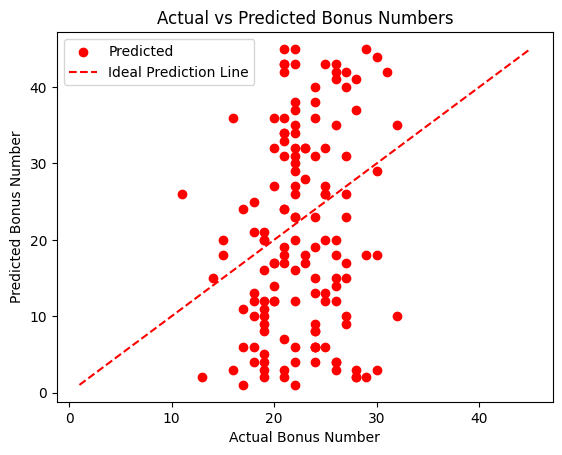

In [55]:
import matplotlib.pyplot as plt
test_target = test_target.values.flatten()

plt.scatter(predictions, test_target, color='red', label='Predicted')
plt.plot([min(test_target), max(test_target)], [min(test_target), max(test_target)], 'r--', label='Ideal Prediction Line')
plt.xlabel("Actual Bonus Number")
plt.ylabel("Predicted Bonus Number")
plt.title("Actual vs Predicted Bonus Numbers")
plt.legend()